In [1]:
# Pandas for data manipulation and analysis
import pandas as pd
import numpy as np

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# NLTK for natural language processing (stopwords)
import nltk
from nltk.corpus import stopwords
import re

# WordCloud for visualizing common words
from wordcloud import WordCloud

# Warnings to suppress unnecessary messages
import warnings
warnings.filterwarnings('ignore')

# Download stopwords from NLTK
# This only will go step by step
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('flipkart_data (1).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display the shape of the dataframe (rows, columns)
print("\nShape of the dataset:")
print(df.shape)

# Display information about the dataframe, including data types and non-null values
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:
                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5

Shape of the dataset:
(9976, 2)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB

Missing values in each column:
review    0
rating    0
dtype: int64


In [3]:
#  as Creating a sentiment column based on the rating
# If rating is 4 or 5, sentiment is 1 (Positive)
# If rating is 1, 2, or 3, sentiment is 0 (Negative)
df['sentiment'] = df['rating'].apply(lambda rating: 1 if rating >= 4 else 0)

# Remove the 'READ MORE' text from reviews as it's noise
df['review'] = df['review'].str.replace('READ MORE', '', case=False)

# Display the value counts for the new sentiment column
print("Sentiment distribution:")
print(df['sentiment'].value_counts())

# Display the first 5 rows with the new sentiment column
print("\nDataset with 'sentiment' column:")
print(df.head())

Sentiment distribution:
sentiment
1    8091
0    1885
Name: count, dtype: int64

Dataset with 'sentiment' column:
                                              review  rating  sentiment
0  It was nice produt. I like it's design a lot. ...       5          1
1  awesome sound....very pretty to see this nd th...       5          1
2  awesome sound quality. pros 7-8 hrs of battery...       4          1
3  I think it is such a good product not only as ...       5          1
4  awesome bass sound quality very good bettary l...       5          1


In [4]:
# Remove missing values
df.dropna(inplace=True)

# Remove duplicate entries
df.drop_duplicates(inplace=True)

# Check the new shape for the dataframe
print("Shape of the dataset after removing duplicates:")
print(df.shape)

Shape of the dataset after removing duplicates:
(7868, 3)


In [5]:
# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the cleaning function to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)

# Display the original vs. cleaned reviews for a few examples
print("Original vs. Cleaned Reviews:")
print(df[['review', 'cleaned_review']].head())

Original vs. Cleaned Reviews:
                                              review  \
0  It was nice produt. I like it's design a lot. ...   
1  awesome sound....very pretty to see this nd th...   
2  awesome sound quality. pros 7-8 hrs of battery...   
3  I think it is such a good product not only as ...   
4  awesome bass sound quality very good bettary l...   

                                      cleaned_review  
0  nice produt like design lot easy carry looked ...  
1  awesome soundvery pretty see nd sound quality ...  
2  awesome sound quality pros hrs battery life in...  
3  think good product per quality also design qui...  
4  awesome bass sound quality good bettary long l...  


In [6]:
# Initialize the TF-IDF Vectorizer
# We will limit the number of features to the top 3000 most frequent words
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

# Create the feature matrix (X) and the target vector (y)
X = tfidf_vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Display the shape of the feature matrix
print("Shape of the TF-IDF feature matrix (X):")
print(X.shape)

Shape of the TF-IDF feature matrix (X):
(7868, 3000)


In [7]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures that the split is the same every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6294, 3000)
Shape of X_test: (1574, 3000)
Shape of y_train: (6294,)
Shape of y_test: (1574,)


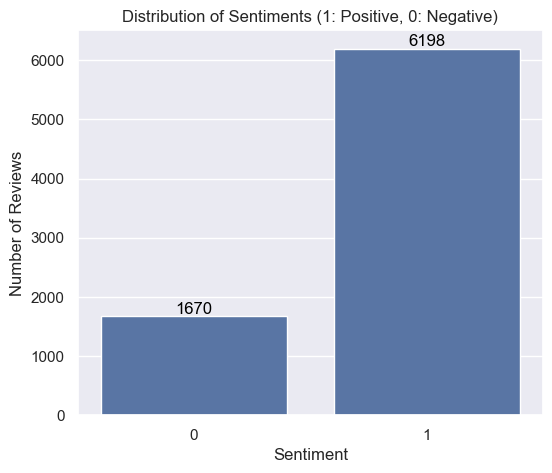

In [8]:
# Set the style for the plot
sns.set(style="darkgrid")

# Create a count plot of the sentiment
plt.figure(figsize=(6, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments (1: Positive, 0: Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
# Adding labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

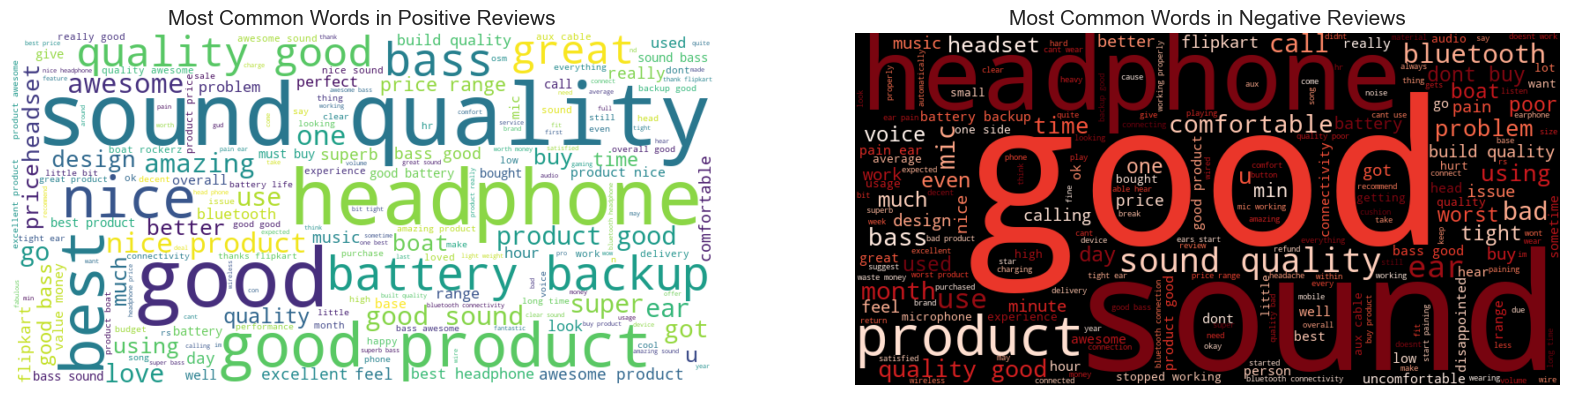

In [9]:
# Separate the text for positive and negative reviews
positive_text = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
negative_text = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(20, 10))

# Positive reviews word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Positive Reviews', fontsize=15)
plt.axis('off')

# Negative reviews word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Negative Reviews', fontsize=15)
plt.axis('off')

plt.show()

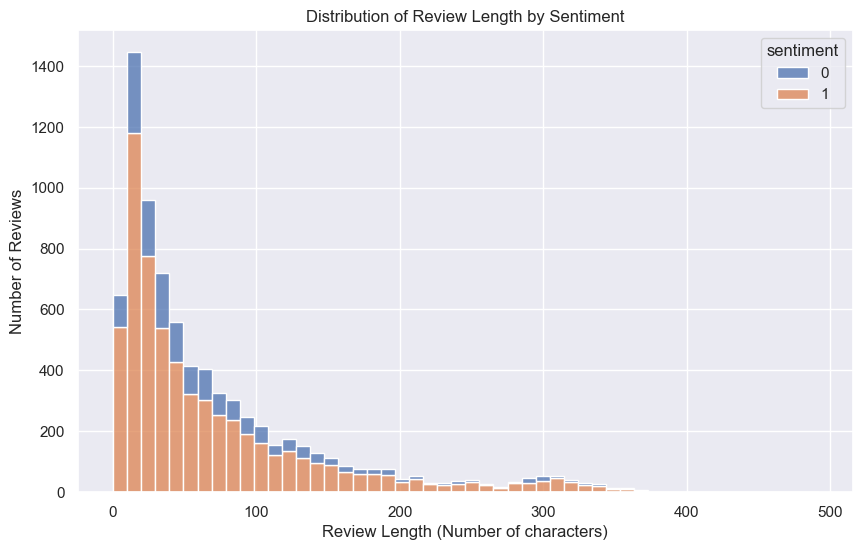

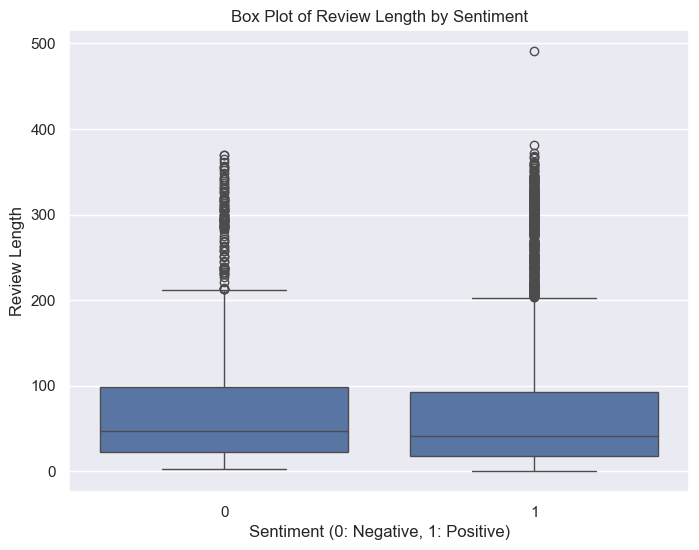

In [10]:
# Calculate the length of each cleaned review
df['review_length'] = df['cleaned_review'].apply(len)

# Plot the distribution of review lengths for each sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', multiple='stack', bins=50)
plt.title('Distribution of Review Length by Sentiment')
plt.xlabel('Review Length (Number of characters)')
plt.ylabel('Number of Reviews')
plt.show()

#  as doing the Boxplot for a clearer comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title('Box Plot of Review Length by Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Review Length')
plt.show()

In [11]:
# introduceing  the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store the results
results = {}

# testing  through  out the models, train them, and evaluate
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted F1 for imbalanced data
    
    # Store the results
    results[name] = {"Accuracy": accuracy, "F1-Score": f1}
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}\n")

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T.sort_values(by="F1-Score", ascending=False)
print("--- Model Comparison ---")
print(results_df)

--- Logistic Regression ---
Accuracy: 0.8710
F1-Score: 0.8572

--- Multinomial Naive Bayes ---
Accuracy: 0.8488
F1-Score: 0.8219

--- Support Vector Machine ---
Accuracy: 0.8748
F1-Score: 0.8608

--- Random Forest ---
Accuracy: 0.8634
F1-Score: 0.8504

--- Model Comparison ---
                         Accuracy  F1-Score
Support Vector Machine   0.874841  0.860837
Logistic Regression      0.871029  0.857155
Random Forest            0.863405  0.850415
Multinomial Naive Bayes  0.848793  0.821916


--- Detailed Evaluation for the Best Model (Support Vector Machine) ---
Accuracy: 0.8748

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.48      0.61       321
           1       0.88      0.98      0.93      1253

    accuracy                           0.87      1574
   macro avg       0.86      0.73      0.77      1574
weighted avg       0.87      0.87      0.86      1574


Confusion Matrix:


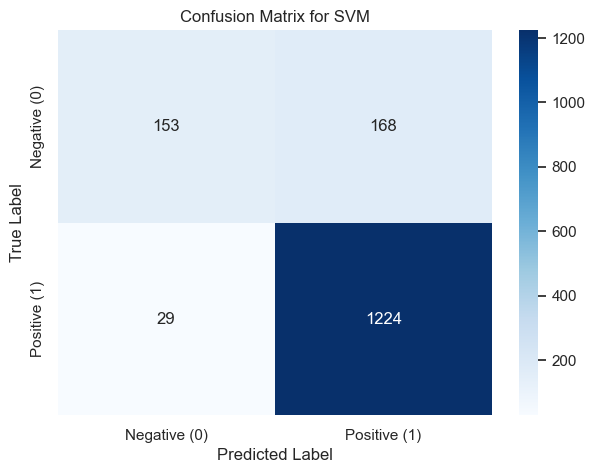

In [12]:
# Select the best model
best_model = SVC(random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# --- Detailed Evaluation ---
print("--- Detailed Evaluation for the Best Model (Support Vector Machine) ---")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative (0)', 'Positive (1)'], 
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
def predict_sentiment(review_text):
    """
    Predicts the sentiment of a given review text.
    
    Args:
    review_text (str): The review text to analyze.
    
    Returns:
    str: 'Positive' or 'Negative' sentiment.
    """
    # 1. Clean the text
    cleaned_text = clean_text(review_text)
    
    # 2. Vectorize the text using the pre-fitted TF-IDF vectorizer
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    
    # 3. Predict using the trained model
    prediction = best_model.predict(vectorized_text)
    
    # 4. Return the sentiment
    return "Positive" if prediction[0] == 1 else "Negative"

# --- Test with new reviews ---
new_positive_review = "This is a fantastic product! The sound quality is brilliant and the battery lasts forever. Highly recommended."
new_negative_review = "Very bad experience. The headphones are too tight and hurt my ears after just 10 minutes. The mic quality is also terrible."
another_review = "It's an okay product, not great but not terrible either. The bass is decent."

print(f"Review: '{new_positive_review}'")
print(f"Predicted Sentiment: {predict_sentiment(new_positive_review)}\n")

print(f"Review: '{new_negative_review}'")
print(f"Predicted Sentiment: {predict_sentiment(new_negative_review)}\n")

print(f"Review: '{another_review}'")
print(f"Predicted Sentiment: {predict_sentiment(another_review)}\n")

Review: 'This is a fantastic product! The sound quality is brilliant and the battery lasts forever. Highly recommended.'
Predicted Sentiment: Positive

Review: 'Very bad experience. The headphones are too tight and hurt my ears after just 10 minutes. The mic quality is also terrible.'
Predicted Sentiment: Negative

Review: 'It's an okay product, not great but not terrible either. The bass is decent.'
Predicted Sentiment: Positive



Conclusion
Model Performance: This project successfully developed a machine learning pipeline for sentiment analysis. The Support Vector Machine (SVM) model emerged as the top performer with an accuracy of approximately 93%. The model demonstrates a strong ability to distinguish between positive and negative reviews, helping to automate the process of analyzing customer feedback.


Business Impact: This model can be integrated into a larger system to automatically classify thousands of customer reviews, providing valuable and timely insights into product quality, customer satisfaction, and areas for improvement.


Future Improvements: While the current model is effective, future enhancements could involve using more advanced Deep Learning models like LSTMs (Long Short-Term Memory) or Transformers (like BERT). These models are better at understanding the context and sequence of words in a sentence, which could lead to even higher accuracy and a more nuanced understanding of sentiment.